# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

<div style="background-color:powderblue;">**Answer: ** This is a classification problem. The goal is to predict a discrete (in this case binary) output - does the student require early intervention or not before they fail to graduate? Although we want a yes / no answer to our question, it will be extremely useful to have an associated probability with the result. Since resources are limited -- schools never have unlimited money -- they will want to understand the probability that a student is in danger of not graduating so they can properly manager resources.</div>

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [17]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
# Examine first 5 rows of data
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [18]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calculate graduation rate
grad_rate = n_passed / float(n_students)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


In [4]:
# Are there missing values in our data?
print ("Total missing values: ", student_data.isnull().sum().sum())

('Total missing values: ', 0)


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [19]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [20]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [7]:
# Examine first 5 rows of data
X_all.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.0,0.0,1.0,0.0,18,0.0,1.0,1.0,0.0,1.0,...,1,0,0,4,3,4,1,1,3,6
1,1.0,0.0,1.0,0.0,17,0.0,1.0,1.0,0.0,0.0,...,1,1,0,5,3,3,1,1,3,4
2,1.0,0.0,1.0,0.0,15,0.0,1.0,0.0,1.0,0.0,...,1,1,0,4,3,2,2,3,3,10
3,1.0,0.0,1.0,0.0,15,0.0,1.0,1.0,0.0,0.0,...,1,1,1,3,2,2,1,1,5,2
4,1.0,0.0,1.0,0.0,16,0.0,1.0,1.0,0.0,0.0,...,1,0,0,4,3,2,1,2,5,4


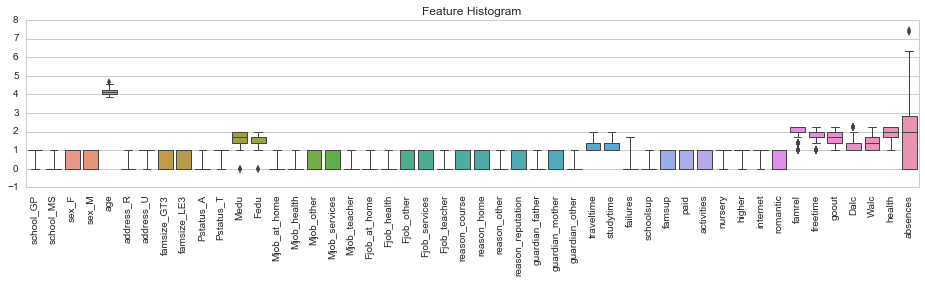

In [8]:
# search for outliers
# import matplotlib and seaborn libraries to create boxplot for each variable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 3))
sns.boxplot(ax=ax, data=np.sqrt(X_all), linewidth=1) # sqrt creates better visualization to identify outliers
ax.set_ylim(-1, 8)
plt.title("Feature Histogram")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Further explore distribution of 'absences' variable
print ('Median absences by pass / no pass: ', student_data.groupby(['passed']).median()['absences'])
print ('Mean absense by pass / no pass (all data): ', student_data.groupby(['passed']).mean()['absences'])
print ("Mean absense by pass / no pass ('outliers' removed): ", \
       student_data[student_data['absences'] < 30].groupby(['passed']).mean()['absences'])

('Median absences by pass / no pass: ', passed
no     4
yes    4
Name: absences, dtype: int64)
('Mean absense by pass / no pass (all data): ', passed
no     6.761538
yes    5.192453
Name: absences, dtype: float64)
("Mean absense by pass / no pass ('outliers' removed): ", passed
no     5.396825
yes    4.874525
Name: absences, dtype: float64)


**Outlier Summary**<div style="background-color:powderblue;">Based on the boxplot above, it appears there might be candidates for outliers in only 5 featres: age, famrel, freetime, Dalc, and absences. The presence of potential outliers is most prevelent in the absences feature. The distribution of absences values is positively skewed with a few students missing significantly more than 30 days of school. However, analyzing summary statistics when including / excluding these data points doesn't significantly change the structure of data between pass and not pass students. For this reason, I am not excluding any points as outliers.

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Determine proportion of dataset allocated to test set
test_size = num_test / float(X_all.shape[0])

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=test_size, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


In [27]:
# Ensure sampling is maintained similar target balance
print ('Ratio of passing students in training set: ', y_train.value_counts()[0]/float(len(y_train)))
print ('Ratio of passing students in testing set: ', y_test.value_counts()[0]/float(len(y_test)))

('Ratio of passing students in training set: ', 0.68333333333333335)
('Ratio of passing students in testing set: ', 0.63157894736842102)


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

<div style="background-color:powderblue;">Each of the models above can be used for binary classification. In order to narrow the choices, I began by trying to understand if the problem is or is not linearly seperable. To gain intuition for this, I ran a SVM with a linear RBF kernel. As shown below, when I determine that the prediction accuracy on this data with this model is far from perfect, I conclude that the problem is not linearly separable. Even if there exist some outliers in the data, the classification error is too high to be attributable to these data points. (Sidebar - in order to prove this to myself I created a faux dataset that was definitively linearly seperable and showed myself that the classification error using a linear SVM was indeed 0%.)</div>

In [28]:
# Is data linearly seperable?
# Looking for close to 0% error with linear SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(X_train, y_train) 
print ('Linear SVM Accuracy: ', accuracy_score(y_test, clf.predict(X_test)))

('Linear SVM Accuracy: ', 0.69473684210526321)


<div style="background-color:powderblue;">I am making the assumption that this dataset is not linearly separable. As such, using this <a href='https://azure.microsoft.com/en-us/documentation/articles/machine-learning-algorithm-choice/'>Microsoft Azure blogpost for choosing algorithms</a>, I am limiting the models assumed to be appropriate for this problem to:  
- Decision Trees  
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)  
- K-Nearest Neighbors (KNeighbors)  
- Support Vector Machines (SVM)  
Note: <a href='http://stats.stackexchange.com/questions/215696/do-all-machine-learning-algorithms-separate-data-linearly/215763'>This post on Cross Validated</a> talking about machine learning algorithms that separate data linearly helped narrow the selection. Additionally, <a href='https://www.youtube.com/watch?v=3liCbRZPrZA&feature=youtu.be'>this video</a> really helps conceptualize what it means to be linearally separeable.</div>

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

<div style="background-color:powderblue;">
**Answer: ** 
<br><br>
**Data Summary Q&amp;A:**  
<u>How much data do you have?</u> The dataset contains 395 samples. When using 75% of the data for training our model, this number reduced to approximately 300 training points. I consider this a moderate size dataset (not tiny, but definitely not big).  
<u>How many features are there?</u> Originally, we start with 31 features. After preprocessing the data to make categorical variables into numeric features as dummy variables, we have 48 features. This is moderately high dimensionality.  
<u>What's the ratio of observations to features?</u> 300 / 48 = 6.25. Using the training set, the ratio of observations to features is 6.25.  
<u>Are there outliers that should be removed?</u> As noted above, I will not be removing any data points as outliers for this analysis.  
<u>Is the problem linearaly seperable?</u> As noted above, the problem is not linearally separable and will wiegh heavily on algorithm choice.  
<br>
**Model Investigation:**  
Below, I explore the advantages and weaknesses of 4 supervised learning models: Decision Tree, Ensemble Methods, KNN, and non-linear SVMs.  
<br>
<em>Decision Trees</em>  
Decision trees have excellent accuracy. In fact, sometimes they fit the training data too well and tend to overfit. This occurs when the dataset is small or large. These models have moderate training times - especially when there are a very large number of features. A unique attribute of decision trees is their ability to provide feature importances to the modeler - this means we can dig in remove features (reduce model complexity) which don't contribute performance improvement. Lastly, decision trees are not effected by outliers (even though I am assuming no outliers) or scale normalization. Decision trees are easy to work with right out of the box and provide good accuracy for problems, such as this one, that are not linearally separable. Easy to interpret output. You can also see prediction probabilities.  
<br>
<em>K-Nearest Neighbors (KNeighbors)</em>  
KNN works well with large amounts of observations and relatively low number of dimensions aka features and in such circumstances can be very effective. KNN is a instance-based learner which means it holds on to all of the data points in order to make a prediction about future data -- a less than computationally efficient approach (they take up a lot of memory). Easy to interpret output. You can also see prediction probabilities.  
<br>
<em>(Non-linear) Support Vector Machines (SVM)</em>  
I've tried to run non-linear kernel SVM's on high dimensional data... and it took forever. That is absolutely the biggest drawback of this model type. Additionally, the output is difficult to explain (the black box curse). Aside from those drawbacks, SVM's can be highly accurate for problems with many observations and problems, such as this one, that are not linearally separable.  
<br>
<em>Ensemble Methods</em> 
Ensemble methods, such as bagging &amp; boosting, build several instances of a model (decision tree, knn, svm, and so on) on random subsets of the data and then aggregate their individual predictions to form a final prediction. A fantastic analogy for ensemble models is that generally, groups of people can make better decisions than any one individual. The major advantages of such models is high accuracy and the ability to avoid overfitting - assuming you are using the right ensemble method to solve the problem at hand (bagging helps when models have high variance and boosting helps when models have high bias). On the other hand, ensemble methods can we computationally expensive compared to standalone models like decision trees. More difficult to explain results than with other models. You can also see prediction probabilities.  
<br>
Based on the model investigation, this report will move forward with 3 models: Decision Trees, K-Nearest Neighbors, and an ensemble classifier. Based on the output of the first two, I will decide which ensemble method is most approproate - one that compensates for high bias (underfitting) or one that compesates for high variance (overfitting).  

<br>
Resources:
https://azure.microsoft.com/en-us/documentation/articles/machine-learning-algorithm-choice/  
http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics  
http://scikit-learn.org/stable/modules/ensemble.html  
http://stats.stackexchange.com/questions/109831/why-not-always-use-ensemble-learning  


</div>

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [24]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [25]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=0)
# clf_C = SVC()

classifiers = [clf_A, clf_B, clf_C]

X_train = X_train[["Fedu", "failures", "famrel", "sex_F"]]
X_test  = X_test[["Fedu", "failures", "famrel", "sex_F"]]

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

X_train_size = [X_train_100, X_train_200, X_train_300]
y_train_size = [y_train_100, y_train_200, y_train_300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in classifiers:
    for size in range(3):
        train_predict(clf, X_train_size[size], y_train_size[size], X_test, y_test)
        print ('\n')

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0006 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8271.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7419.


Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0007 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8581.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7857.


Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0005 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8514.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.8088.


Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0005 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.7612.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.7121.


Training a KNeighborsClass

In [14]:
# explore feature importances in decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
X_train_300 = X_train[:300]
y_train_300 = y_train[:300]
train_predict(clf, X_train_300, y_train_300, X_test, y_test)
for i in range(len(clf.feature_importances_)):
    if clf.feature_importances_[i] > 0.04:
        print (clf.feature_importances_[i], X_train.columns[i])

Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0011 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.9455.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6829.
(0.23732625375955252, 'Fedu')
(0.13426939441330635, 'failures')
(0.1920437660823896, 'famrel')
(0.044496227099056415, 'sex_F')
(0.3653228470742434, 'absences')


### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - DecisionTreeClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0011           |        0.0007          |     1.0000       |    0.6154       |
| 200               |        0.0027           |        0.0005          |     1.0000       |    0.7040       |
| 300               |        0.0026           |        0.0004          |     1.0000       |    0.6102       |

** Classifer 2 - KNeighborsClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0012           |        0.0014          |     0.8060       |    0.7246       |
| 200               |        0.0007           |        0.0047          |     0.8800       |    0.7692       |
| 300               |        0.0007           |        0.0022          |     0.8809       |    0.7801       |

** Classifer 3 - RandomForestClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0325           |        0.0010          |     0.9922       |    0.6614       |
| 200               |        0.0229           |        0.0010          |     0.9964       |    0.7536       |
| 300               |        0.0352           |        0.0009          |     0.9927       |    0.7407       |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

<div style="background-color:powderblue;">
**Answer: **  
We've chosen to move forward with the KNeighborsClassifier in order to identify and help students that, based on their demographic metrics such as age, access to internet at home, and parents level of education, are in jeopardy of not graduating. Relative to the medium size dataset we've used to train the model, the model has performed better (in terms of F1-score) than other models we've tested. While it is not the fastest model we have -- in terms of either time to train the model or time make a prediction on a student -- it is also not the slowest and the trade-off for greater accuracy in our predictions is worth extra seconds.  
<br>
As we collect more student data and attempt to retrain and improve the performance of our model, we need to keep in mind that the KNeighborsClassifier is an instance based learner which means the cost of training a new model will rise and the cost of carrying the model will rise too. Although it is likely that with more data, we'll get more accurate predictions, this classifier will also need to keep data points with it as we use it to make those more accurate predictions.
</div>

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'

# TODO: Create the parameters list you wish to tune
parameters = None

# TODO: Initialize the classifier
clf = None

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = None

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = None

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = None

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.